In [4]:
import pandas as pd
import numpy as np 

In [ ]:
#Replace with your actual file path
df = pd.read_csv("/Users/surajtk/Documents/ITMD-526/Data Visualization - Dashboards and Reports/Data visualization/Datasets/Chicago_Energy_Benchmarking_20250402.csv") 

df.head()  # Preview first 5 rows
df.info()  # Overview of columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27005 entries, 0 to 27004
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   27005 non-null  int64  
 1   ID                                          27005 non-null  int64  
 2   Property Name                               24149 non-null  object 
 3   Reporting Status                            27005 non-null  object 
 4   Address                                     27005 non-null  object 
 5   ZIP Code                                    27005 non-null  object 
 6   Chicago Energy Rating                       18180 non-null  float64
 7   Exempt From Chicago Energy Rating           16642 non-null  object 
 8   Community Area                              26827 non-null  object 
 9   Primary Property Type                       24006 non-null  object 
 10  Gross Floo

In [6]:
# Fill missing values without using inplace=True
df['Year Built'] = df['Year Built'].fillna(df['Year Built'].median())
df['Exempt From Chicago Energy Rating'] = df['Exempt From Chicago Energy Rating'].fillna('Not Available')
df['Community Area'] = df['Community Area'].fillna('Unknown')
df['Gross Floor Area - Buildings (sq ft)'] = df['Gross Floor Area - Buildings (sq ft)'].fillna(df['Gross Floor Area - Buildings (sq ft)'].median())


In [7]:
# Normalize column formats
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [8]:
# Check the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [9]:
# Convert categorical columns to 'category' for memory efficiency
df['Property Name'] = df['Property Name'].astype('category')
df['Reporting Status'] = df['Reporting Status'].astype('category')
df['Exempt From Chicago Energy Rating'] = df['Exempt From Chicago Energy Rating'].astype('category')
df['Primary Property Type'] = df['Primary Property Type'].astype('category')
df['Community Area'] = df['Community Area'].astype('category')
df['Location'] = df['Location'].astype('category')
df['ZIP Code'] = df['ZIP Code'].astype('category')

# Convert 'Year Built' to float64 (if not already) and ensure 'ENERGY STAR Score' is numeric
# df['Year Built'] = pd.to_numeric(df['Year Built'], errors='coerce')
# df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')

# Convert 'Data Year' to datetime if it makes sense (but it's currently an integer)
# df['Data Year'] = pd.to_datetime(df['Data Year'], format='%Y', errors='coerce')

# Check if the conversion worked by inspecting the dtypes again
print(df.dtypes)


Data Year                                        int64
ID                                               int64
Property Name                                 category
Reporting Status                              category
Address                                         object
ZIP Code                                      category
Chicago Energy Rating                          float64
Exempt From Chicago Energy Rating             category
Community Area                                category
Primary Property Type                         category
Gross Floor Area - Buildings (sq ft)           float64
Year Built                                     float64
# of Buildings                                 float64
Water Use (kGal)                               float64
ENERGY STAR Score                              float64
Electricity Use (kBtu)                         float64
Natural Gas Use (kBtu)                         float64
District Steam Use (kBtu)                      float64
District C

In [10]:
# Strip leading/trailing spaces from all string entries in categorical columns
df['Property Name'] = df['Property Name'].str.strip()
df['Reporting Status'] = df['Reporting Status'].str.strip()
df['Exempt From Chicago Energy Rating'] = df['Exempt From Chicago Energy Rating'].str.strip()
df['Community Area'] = df['Community Area'].str.strip()
df['Primary Property Type'] = df['Primary Property Type'].str.strip()
df['Location'] = df['Location'].str.strip()
df['ZIP Code'] = df['ZIP Code'].str.strip()


In [11]:
# Check unique values for a specific column
print(df['Primary Property Type'].unique())
print(df['Exempt From Chicago Energy Rating'].unique())
print(df['Reporting Status'].unique())


[nan 'Office' 'Multifamily Housing' 'Hotel' 'K-12 School' 'Library'
 'Supermarket/Grocery Store' 'Medical Office' 'Mixed Use Property'
 'Senior Living Community' 'Other - Recreation' 'College/University'
 'Hospital (General Medical & Surgical)' 'Worship Facility' 'Museum'
 'Residence Hall/Dormitory' 'Performing Arts' 'Other' 'Retail Store'
 'Automobile Dealership' 'Other - Mall' 'Residential Care Facility'
 'Data Center' 'Social/Meeting Hall' 'Wholesale Club/Supercenter'
 'Laboratory' 'Adult Education' 'Senior Care Community' 'Financial Office'
 'Other - Services' 'Other - Lodging/Residential'
 'Other - Entertainment/Public Assembly' 'Strip Mall' 'Movie Theater'
 'Enclosed Mall' 'Fitness Center/Health Club/Gym'
 'Other - Specialty Hospital' 'Urgent Care/Clinic/Other Outpatient'
 'Courthouse' 'Pre-school/Daycare' 'Other - Public Services'
 'Outpatient Rehabilitation/Physical Therapy'
 'Repair Services (Vehicle, Shoe, Locksmith, etc.)' 'Prison/Incarceration'
 'Convention Center' 'Ice/Cur

In [12]:
# Replace NaN or empty strings with a placeholder value
df['Primary Property Type'].fillna('Unknown', inplace=True)
df['Exempt From Chicago Energy Rating'].fillna('Not Available', inplace=True)
df['Reporting Status'].fillna('Not Available', inplace=True)

# Standardize 'Primary Property Type' values
df['Primary Property Type'] = df['Primary Property Type'].replace({
    'Multifamily\xa0Housing': 'Multifamily Housing',  # Fix non-breaking space issue
    'Multifamily Housing': 'Multifamily Housing',
    'Residential Care Facility': 'Residential Care Facility',
    'Retail Store': 'Retail Store',
    'Worship Facility': 'Worship Facility',
    'Hotel': 'Hotel',
    'Office': 'Office',
    'Library': 'Library',
    'Supermarket/Grocery Store': 'Supermarket/Grocery Store',
    'Medical Office': 'Medical Office',
    'Senior Living Community': 'Senior Living Community',
    'Other - Recreation': 'Other - Recreation',
    'K-12 School': 'K-12 School',
    'Mixed Use Property': 'Mixed Use Property',
    'College/University': 'College/University',
    'Hospital (General Medical & Surgical)': 'Hospital (General Medical & Surgical)',
    'Museum': 'Museum',
    'Performing Arts': 'Performing Arts',
    'Automobile Dealership': 'Automobile Dealership',
    'Data Center': 'Data Center',
    'Residence Hall/Dormitory': 'Residence Hall/Dormitory',
    'Residential': 'Residential',
    'Other': 'Other',
    'Vehicle Dealership': 'Vehicle Dealership',
    'Retail Store': 'Retail Store',
    'Fitness Center/Health Club/Gym': 'Fitness Center/Health Club/Gym',
    'Other - Public Services': 'Other - Public Services',
    'Movie Theater': 'Movie Theater',
    'Ice/Curling Rink': 'Ice/Curling Rink',
    'Lifestyle Center': 'Lifestyle Center',
    'Ambulatory Surgical Center': 'Ambulatory Surgical Center',
    'Prison/Incarceration': 'Prison/Incarceration',
    'Residential Care Facility': 'Residential Care Facility',
    'Lodging': 'Lodging',
    'Municipal': 'Municipal'
})

# Standardize 'Exempt From Chicago Energy Rating' values
df['Exempt From Chicago Energy Rating'] = df['Exempt From Chicago Energy Rating'].replace({
    'Not Available': 'Not Available',  # Ensure consistency with placeholder
    'Yes': 'Exempt',
    'No': 'Not Exempt',
    'Exempt': 'Exempt',
    'Unknown': 'Not Available'
})

# Standardize 'Reporting Status' values
df['Reporting Status'] = df['Reporting Status'].replace({
    'Not Submitted': 'Not Submitted',
    'Submitted Data': 'Submitted Data',
    'Submitted': 'Submitted',
    'Exempt': 'Exempt'
})

# Strip spaces and ensure case consistency
df['Primary Property Type'] = df['Primary Property Type'].str.strip().str.lower()
df['Exempt From Chicago Energy Rating'] = df['Exempt From Chicago Energy Rating'].str.strip().str.lower()
df['Reporting Status'] = df['Reporting Status'].str.strip().str.lower()

# Check unique values after standardization
print(df['Primary Property Type'].unique())
print(df['Exempt From Chicago Energy Rating'].unique())
print(df['Reporting Status'].unique())


['unknown' 'office' 'multifamily housing' 'hotel' 'k-12 school' 'library'
 'supermarket/grocery store' 'medical office' 'mixed use property'
 'senior living community' 'other - recreation' 'college/university'
 'hospital (general medical & surgical)' 'worship facility' 'museum'
 'residence hall/dormitory' 'performing arts' 'other' 'retail store'
 'automobile dealership' 'other - mall' 'residential care facility'
 'data center' 'social/meeting hall' 'wholesale club/supercenter'
 'laboratory' 'adult education' 'senior care community' 'financial office'
 'other - services' 'other - lodging/residential'
 'other - entertainment/public assembly' 'strip mall' 'movie theater'
 'enclosed mall' 'fitness center/health club/gym'
 'other - specialty hospital' 'urgent care/clinic/other outpatient'
 'courthouse' 'pre-school/daycare' 'other - public services'
 'outpatient rehabilitation/physical therapy'
 'repair services (vehicle, shoe, locksmith, etc.)' 'prison/incarceration'
 'convention center' 'i

/var/folders/xg/glg0kp_x60qcnlp4f4v7gnz80000gn/T/ipykernel_5251/1683166212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Primary Property Type'].fillna('Unknown', inplace=True)
/var/folders/xg/glg0kp_x60qcnlp4f4v7gnz80000gn/T/ipykernel_5251/1683166212.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [13]:
#Building age
df['Building Age'] = 2025 - df['Year Built']


In [14]:
#Energy Use per sq ft
df['Electricity Intensity'] = df['Electricity Use (kBtu)'] / df['Gross Floor Area - Buildings (sq ft)']
df['Gas Intensity'] = df['Natural Gas Use (kBtu)'] / df['Gross Floor Area - Buildings (sq ft)']


In [15]:
# Check for high values
df[['Gross Floor Area - Buildings (sq ft)', 'ENERGY STAR Score', 'Total GHG Emissions (Metric Tons CO2e)']].describe()

# Optionally cap or remove extreme outliers:
q_low = df['ENERGY STAR Score'].quantile(0.01)
q_hi  = df['ENERGY STAR Score'].quantile(0.99)
df = df[(df['ENERGY STAR Score'] >= q_low) & (df['ENERGY STAR Score'] <= q_hi)]


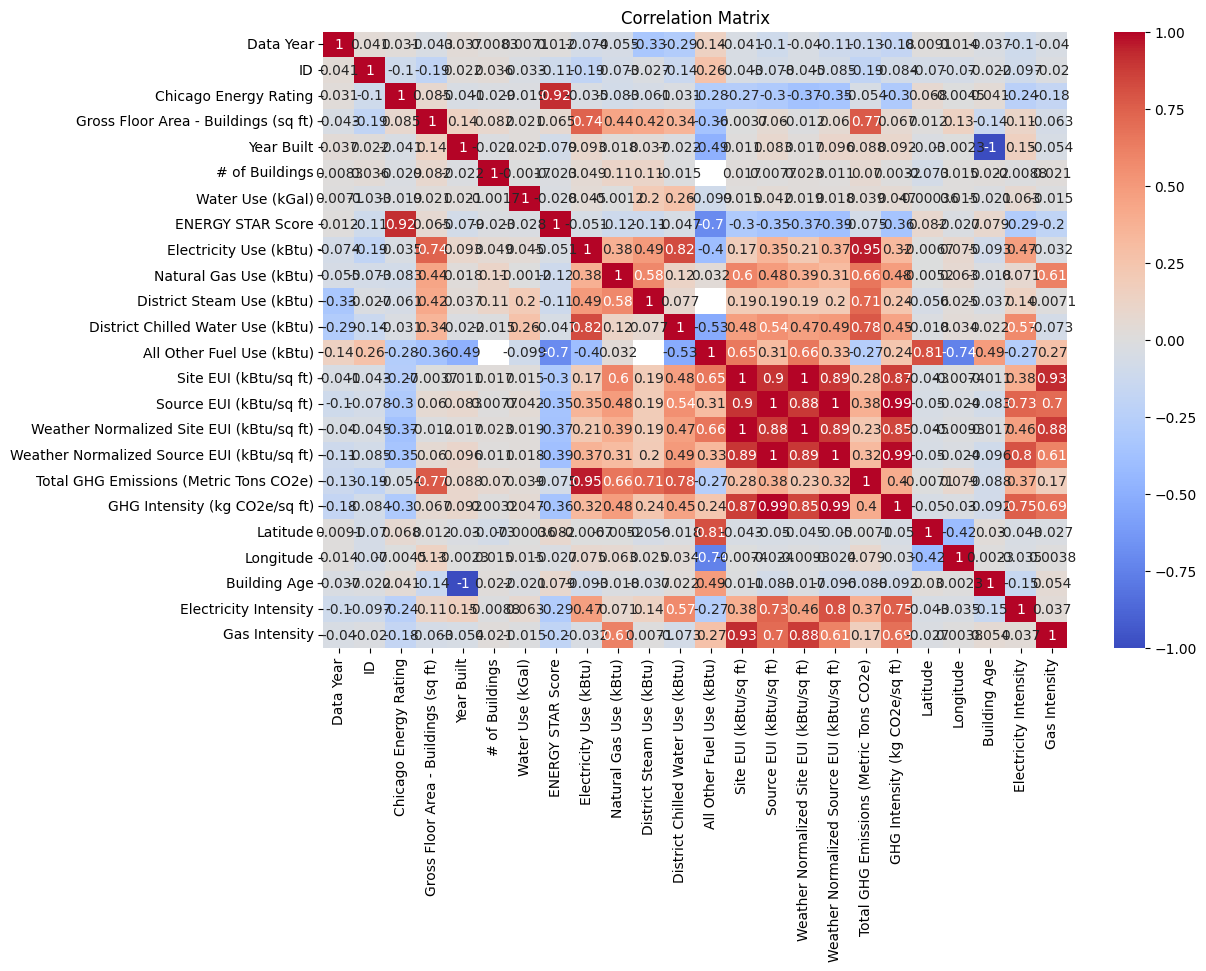

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [17]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix.isna().sum())


Data Year                                     0
ID                                            0
Chicago Energy Rating                         0
Gross Floor Area - Buildings (sq ft)          0
Year Built                                    0
# of Buildings                                1
Water Use (kGal)                              0
ENERGY STAR Score                             0
Electricity Use (kBtu)                        0
Natural Gas Use (kBtu)                        0
District Steam Use (kBtu)                     1
District Chilled Water Use (kBtu)             0
All Other Fuel Use (kBtu)                     2
Site EUI (kBtu/sq ft)                         0
Source EUI (kBtu/sq ft)                       0
Weather Normalized Site EUI (kBtu/sq ft)      0
Weather Normalized Source EUI (kBtu/sq ft)    0
Total GHG Emissions (Metric Tons CO2e)        0
GHG Intensity (kg CO2e/sq ft)                 0
Latitude                                      0
Longitude                               

In [18]:
# Fill missing values for those specific columns
df['# of Buildings'] = df['# of Buildings'].fillna(df['# of Buildings'].median())
df['District Steam Use (kBtu)'] = df['District Steam Use (kBtu)'].fillna(0)  # often missing = not used
df['All Other Fuel Use (kBtu)'] = df['All Other Fuel Use (kBtu)'].fillna(0)  # same assumption


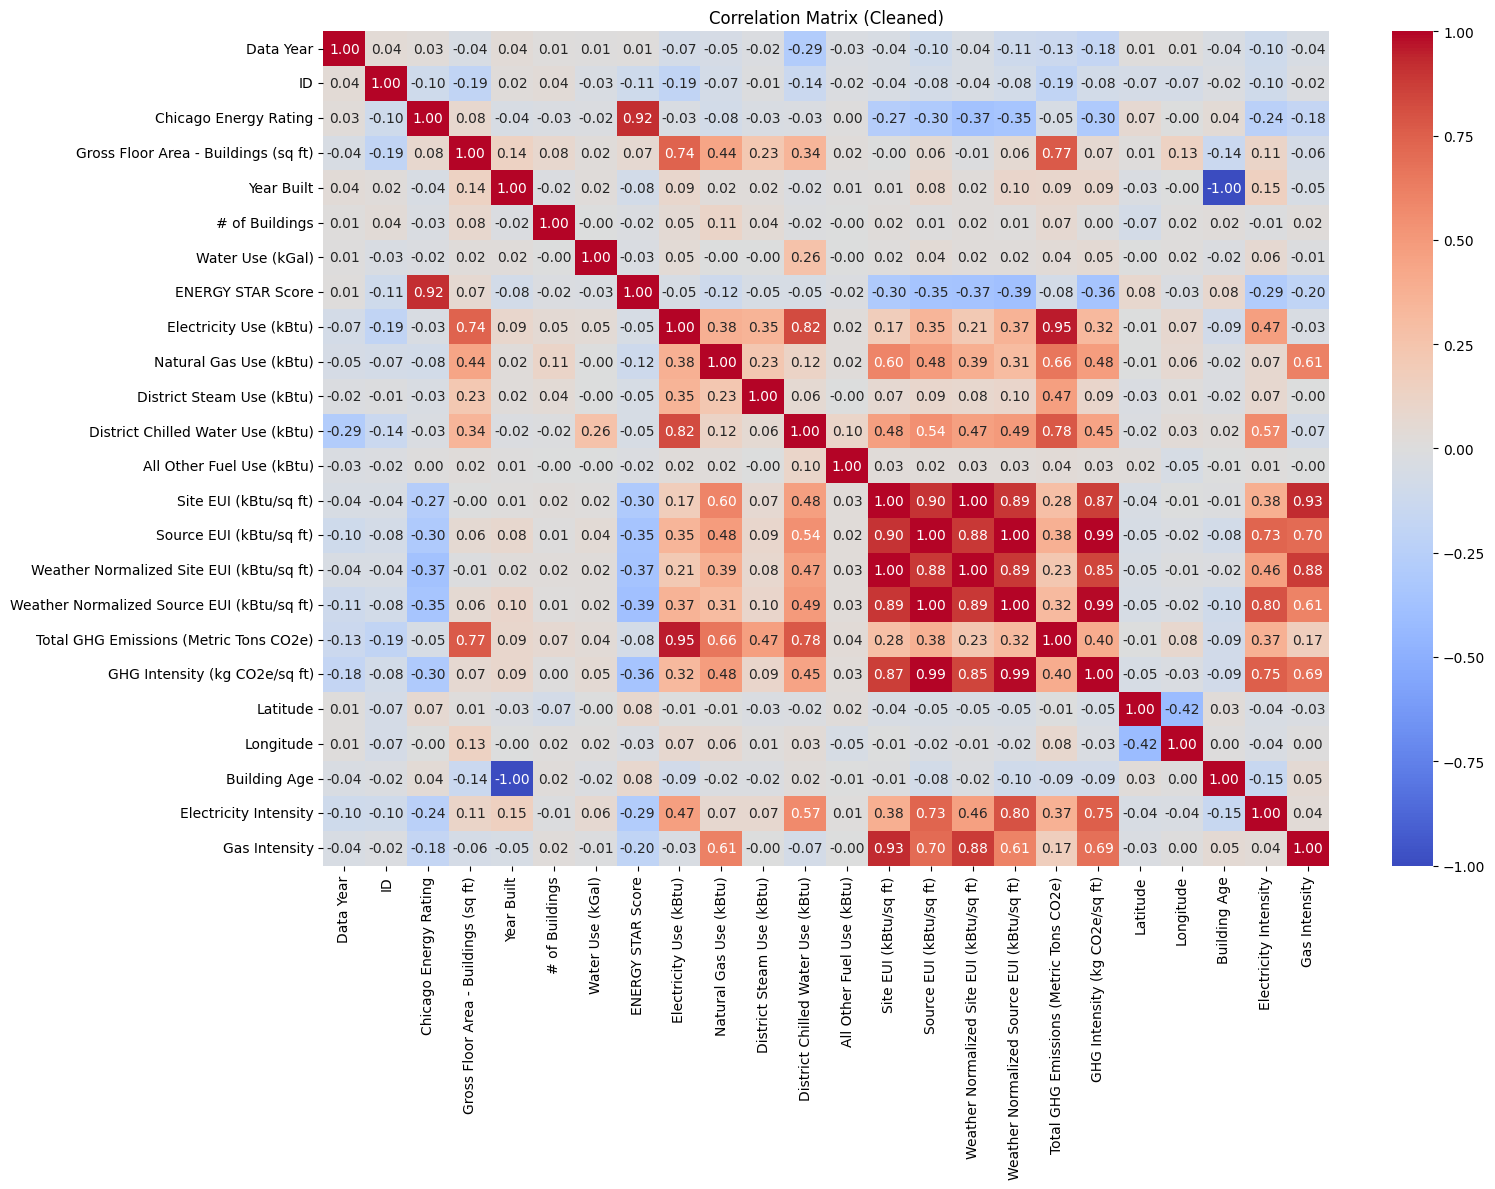

In [19]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Cleaned)")
plt.tight_layout()
plt.show()


In [20]:
df.to_csv("cleaned_chicago_energy_benchmark_data.csv", index=False)

In [21]:
# Count of standard NaN values per column
null_counts = df.isnull().sum()
print("Standard missing (NaN) values:\n", null_counts[null_counts > 0])
# Count of empty strings per column
empty_str_counts = (df == '').sum()
print("\nEmpty string values:\n", empty_str_counts[empty_str_counts > 0])
# Count of whitespace-only cells (e.g., ' ', '   ', '\t')
whitespace_counts = df.apply(lambda col: col.astype(str).str.isspace().sum())
print("\nWhitespace-only values:\n", whitespace_counts[whitespace_counts > 0])
fake_null_keywords = ['null', 'n/a', '-', '--', 'none', 'N/A', 'NULL', 'None', '\xa0']

# Count these "fake nulls" per column
for keyword in fake_null_keywords:
    count = (df.astype(str).apply(lambda x: x.str.lower()) == keyword.lower()).sum()
    if count.sum() > 0: 
        print(f"\nOccurrences of '{keyword}':")
        print(count[count > 0])
# Create a DataFrame that summarizes all blank-like values
blank_summary = pd.DataFrame({
    'NaN': df.isnull().sum(),
    'Empty Strings': (df == '').sum(),
    'Whitespace-only': df.apply(lambda col: col.astype(str).str.isspace().sum())
})

# Add fake nulls summary
for keyword in fake_null_keywords:
    blank_summary[f"'{keyword}'"] = (df.astype(str).apply(lambda x: x.str.lower()) == keyword.lower()).sum()

# Show only columns with any kind of blank
blank_summary = blank_summary.loc[(blank_summary.sum(axis=1) > 0)]
print("\n Summary of all blank-like values:")
print(blank_summary)


Standard missing (NaN) values:
 Property Name                                  1382
Chicago Energy Rating                          6098
Water Use (kGal)                              16568
Electricity Use (kBtu)                           16
Natural Gas Use (kBtu)                         1101
District Chilled Water Use (kBtu)             14710
Source EUI (kBtu/sq ft)                         794
Weather Normalized Site EUI (kBtu/sq ft)        965
Weather Normalized Source EUI (kBtu/sq ft)     2051
Total GHG Emissions (Metric Tons CO2e)         1042
GHG Intensity (kg CO2e/sq ft)                  1043
Latitude                                          6
Longitude                                         6
Location                                          6
Electricity Intensity                            16
Gas Intensity                                  1101
dtype: int64

Empty string values:
 Series([], dtype: int64)

Whitespace-only values:
 Series([], dtype: int64)

Occurrences of '-':
Pro

In [22]:
# Replace '-' with actual NaN
df.replace('-', np.nan, inplace=True)


In [23]:
df['Property Name'] = df['Property Name'].fillna('Unknown')


In [24]:
# Recheck for blanks of any kind
final_check = df.isnull().sum()
print("Final missing values:\n", final_check[final_check > 0])


Final missing values:
 Chicago Energy Rating                          6098
Water Use (kGal)                              16568
Electricity Use (kBtu)                           16
Natural Gas Use (kBtu)                         1101
District Chilled Water Use (kBtu)             14710
Source EUI (kBtu/sq ft)                         794
Weather Normalized Site EUI (kBtu/sq ft)        965
Weather Normalized Source EUI (kBtu/sq ft)     2051
Total GHG Emissions (Metric Tons CO2e)         1042
GHG Intensity (kg CO2e/sq ft)                  1043
Latitude                                          6
Longitude                                         6
Location                                          6
Electricity Intensity                            16
Gas Intensity                                  1101
dtype: int64


In [25]:
df['Chicago Energy Rating'] = df['Chicago Energy Rating'].fillna('Not Rated')


In [26]:

df['Water Use (kGal)'] = df['Water Use (kGal)'].fillna(0)
df['District Chilled Water Use (kBtu)'] = df['District Chilled Water Use (kBtu)'].fillna(0)

df.dropna(subset=[
    'Electricity Use (kBtu)',
    'Natural Gas Use (kBtu)',
    'Source EUI (kBtu/sq ft)',
    'Weather Normalized Site EUI (kBtu/sq ft)',
    'Total GHG Emissions (Metric Tons CO2e)',
    'Latitude', 'Longitude'
], inplace=True)

# Recalculate intensities
df['Electricity Intensity'] = df['Electricity Use (kBtu)'] / df['Gross Floor Area - Buildings (sq ft)']
df['Gas Intensity'] = df['Natural Gas Use (kBtu)'] / df['Gross Floor Area - Buildings (sq ft)']


In [27]:
# Recheck for blanks of any kind
final_check = df.isnull().sum()
print("Final missing values:\n", final_check[final_check > 0])


Final missing values:
 Weather Normalized Source EUI (kBtu/sq ft)    880
dtype: int64


In [28]:
median_val = df['Weather Normalized Source EUI (kBtu/sq ft)'].median()
df['Weather Normalized Source EUI (kBtu/sq ft)'] = df['Weather Normalized Source EUI (kBtu/sq ft)'].fillna(median_val)

In [29]:
df.to_csv("cleaned_chicago_energy_benchmark_data.csv", index=False)

In [30]:
df.dtypes

Data Year                                       int64
ID                                              int64
Property Name                                  object
Reporting Status                               object
Address                                        object
ZIP Code                                       object
Chicago Energy Rating                          object
Exempt From Chicago Energy Rating              object
Community Area                                 object
Primary Property Type                          object
Gross Floor Area - Buildings (sq ft)          float64
Year Built                                    float64
# of Buildings                                float64
Water Use (kGal)                              float64
ENERGY STAR Score                             float64
Electricity Use (kBtu)                        float64
Natural Gas Use (kBtu)                        float64
District Steam Use (kBtu)                     float64
District Chilled Water Use (

In [31]:
print(df.columns)

Index(['Data Year', 'ID', 'Property Name', 'Reporting Status', 'Address',
       'ZIP Code', 'Chicago Energy Rating',
       'Exempt From Chicago Energy Rating', 'Community Area',
       'Primary Property Type', 'Gross Floor Area - Buildings (sq ft)',
       'Year Built', '# of Buildings', 'Water Use (kGal)', 'ENERGY STAR Score',
       'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)',
       'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location',
       'Row_ID', 'Building Age', 'Electricity Intensity', 'Gas Intensity'],
      dtype='object')


In [32]:
print(df['Community Area'].unique()[:10])


['Unknown' 'LOOP' 'LINCOLN PARK' 'MCKINLEY PARK' 'KENWOOD'
 'NEAR WEST SIDE' 'NEAR NORTH SIDE' 'Englewood' 'NEAR SOUTH SIDE' 'Loop']


In [33]:
print(df.columns.tolist())


['Data Year', 'ID', 'Property Name', 'Reporting Status', 'Address', 'ZIP Code', 'Chicago Energy Rating', 'Exempt From Chicago Energy Rating', 'Community Area', 'Primary Property Type', 'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings', 'Water Use (kGal)', 'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)', 'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)', 'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)', 'Weather Normalized Source EUI (kBtu/sq ft)', 'Total GHG Emissions (Metric Tons CO2e)', 'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location', 'Row_ID', 'Building Age', 'Electricity Intensity', 'Gas Intensity']


In [34]:
print(df.columns[df.columns.str.contains("community", case=False)])

Index(['Community Area'], dtype='object')


In [35]:
# Trim ZIP Code to 5 digits
df['ZIP Code'] = df['ZIP Code'].astype(str).str.extract(r'(\d{5})')[0]

In [36]:
df = pd.read_csv("/Users/surajtk/Documents/ITMD-521/sthimmakrishnaram/ITMD-526/Data visualization/cleaned_chicago_energy_data.csv")

# Confirm the column is there
print(df.columns[df.columns.str.contains("community", case=False)])

Index(['Community Area', 'Community Area Code'], dtype='object')


/var/folders/xg/glg0kp_x60qcnlp4f4v7gnz80000gn/T/ipykernel_5251/4129796820.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/surajtk/Documents/ITMD-521/sthimmakrishnaram/ITMD-526/Data visualization/cleaned_chicago_energy_data.csv")


In [37]:
# FACT TABLE: Energy usage, emissions, intensity, score, per property per year
fact_energy = df[[
    'Row_ID', 'ID', 'Data Year',
    'ENERGY STAR Score',
    'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
    'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
    'All Other Fuel Use (kBtu)',
    'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)',
    'Weather Normalized Site EUI (kBtu/sq ft)', 'Weather Normalized Source EUI (kBtu/sq ft)',
    'Total GHG Emissions (Metric Tons CO2e)', 'GHG Intensity (kg CO2e/sq ft)',
    'Electricity Intensity', 'Gas Intensity'
]]
# DIM TABLE: Property (static details about the building)
dim_property = df[[
    'ID', 'Property Name', 'Primary Property Type',
    'Year Built', 'Building Age',
    '# of Buildings', 'Gross Floor Area - Buildings (sq ft)'
]].drop_duplicates(subset='ID')
# DIM TABLE: Location
dim_location = df[[
    'ID', 'ZIP Code', 'Community Area', 'Latitude', 'Longitude', 'Location', 'Community Area Code'
]].drop_duplicates(subset='ID')
# DIM TABLE: Energy Rating + Reporting Info
dim_energy_rating = df[[
    'ID', 'Chicago Energy Rating',
    'Exempt From Chicago Energy Rating', 'Reporting Status'
]].drop_duplicates(subset='ID')
# DIM TABLE: Date 
dim_date = df[['Data Year']].drop_duplicates().sort_values(by='Data Year').copy()
dim_date['Year Category'] = pd.cut(dim_date['Data Year'],
                                   bins=[0, 2017, 2018, 2025],
                                   labels=['Before 2018', '2018', 'After 2018'])


In [38]:
fact_energy.to_csv('fact_energy.csv', index=False)
dim_property.to_csv('dim_property.csv', index=False)
dim_location.to_csv('dim_location.csv', index=False)
dim_energy_rating.to_csv('dim_energy_rating.csv', index=False)
dim_date.to_csv('dim_date.csv', index=False)

In [39]:
# File paths
files = {
    "fact_energy": "fact_energy.csv",
    "dim_property": "dim_property.csv",
    "dim_location": "dim_location.csv",
    "dim_energy_rating": "dim_energy_rating.csv",
    "dim_date": "dim_date.csv"
}

# Check columns in each file
for name, path in files.items():
    try:
        df = pd.read_csv(path)
        print(f"\n{name} ({path}):")
        print(f"Columns: {df.columns.tolist()}")
        print(f"Shape: {df.shape}")
    except Exception as e:
        print(f"\nCould not load {name}: {e}")



fact_energy (fact_energy.csv):
Columns: ['Row_ID', 'ID', 'Data Year', 'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)', 'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)', 'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)', 'Weather Normalized Source EUI (kBtu/sq ft)', 'Total GHG Emissions (Metric Tons CO2e)', 'GHG Intensity (kg CO2e/sq ft)', 'Electricity Intensity', 'Gas Intensity']
Shape: (17220, 17)

dim_property (dim_property.csv):
Columns: ['ID', 'Property Name', 'Primary Property Type', 'Year Built', 'Building Age', '# of Buildings', 'Gross Floor Area - Buildings (sq ft)']
Shape: (2963, 7)

dim_location (dim_location.csv):
Columns: ['ID', 'ZIP Code', 'Community Area', 'Latitude', 'Longitude', 'Location', 'Community Area Code']
Shape: (2963, 7)

dim_energy_rating (dim_energy_rating.csv):
Columns: ['ID', 'Chicago Energy Rating', 'Exempt From Chicago Energy Rating', 'Report

In [40]:
df = pd.read_csv("/Users/surajtk/Documents/ITMD-521/sthimmakrishnaram/ITMD-526/Data visualization/cleaned_chicago_energy_data.csv")

print(df.columns.tolist())


/var/folders/xg/glg0kp_x60qcnlp4f4v7gnz80000gn/T/ipykernel_5251/1326405.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/surajtk/Documents/ITMD-521/sthimmakrishnaram/ITMD-526/Data visualization/cleaned_chicago_energy_data.csv")


['Data Year', 'ID', 'Property Name', 'Reporting Status', 'Address', 'ZIP Code', 'Chicago Energy Rating', 'Exempt From Chicago Energy Rating', 'Community Area', 'Primary Property Type', 'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings', 'Water Use (kGal)', 'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)', 'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)', 'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)', 'Weather Normalized Source EUI (kBtu/sq ft)', 'Total GHG Emissions (Metric Tons CO2e)', 'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location', 'Row_ID', 'Building Age', 'Electricity Intensity', 'Gas Intensity', 'Community Area Code']
